<h1>
<font color="#ff2e2e">
Panorama with OpenCV
</font>
</h1>

In [ ]:
import numpy as np
import cv2
import glob
import matplotlib.pylab as plt
import os
from google.colab.patches import cv2_imshow


<h3><font color = "#079e05"> Read input images from 1 to 8 and show them in a row together </font></h3>

In [ ]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

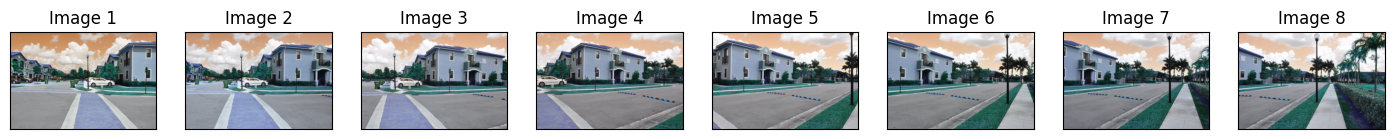

In [ ]:
image_list = []

image1 = cv2.imread('1.jpg')
image2 = cv2.imread('2.jpg')
image3 = cv2.imread('3.jpg')
image4 = cv2.imread('4.jpg')
image5 = cv2.imread('5.jpg')
image6 = cv2.imread('6.jpg')
image7 = cv2.imread('7.jpg')
image8 = cv2.imread('8.jpg')
image_list.append((image1, 'Image 1', 'img'))
image_list.append((image2, 'Image 2', 'img'))
image_list.append((image3, 'Image 3', 'img'))
image_list.append((image4, 'Image 4', 'img'))
image_list.append((image5, 'Image 5', 'img'))
image_list.append((image6, 'Image 6', 'img'))
image_list.append((image7, 'Image 7', 'img'))
image_list.append((image8, 'Image 8', 'img'))
plotter(image_list, 1 , 9, True, 20, 10, '2B')

<h3><font color = "#079e05"> Initialize OpenCV's image sticher object and then perform the image stitching on input images </font></h3>

In [ ]:
l = []
l.append(image1)
l.append(image2)
l.append(image3)
l.append(image4)
l.append(image5)
l.append(image6)
l.append(image7)
l.append(image8)
#stich all the images
stitchy = cv2.Stitcher.create()
(status, stitched_image) = stitchy.stitch(l)

<h3><font color = "#079e05"> Show the result </font></h3>

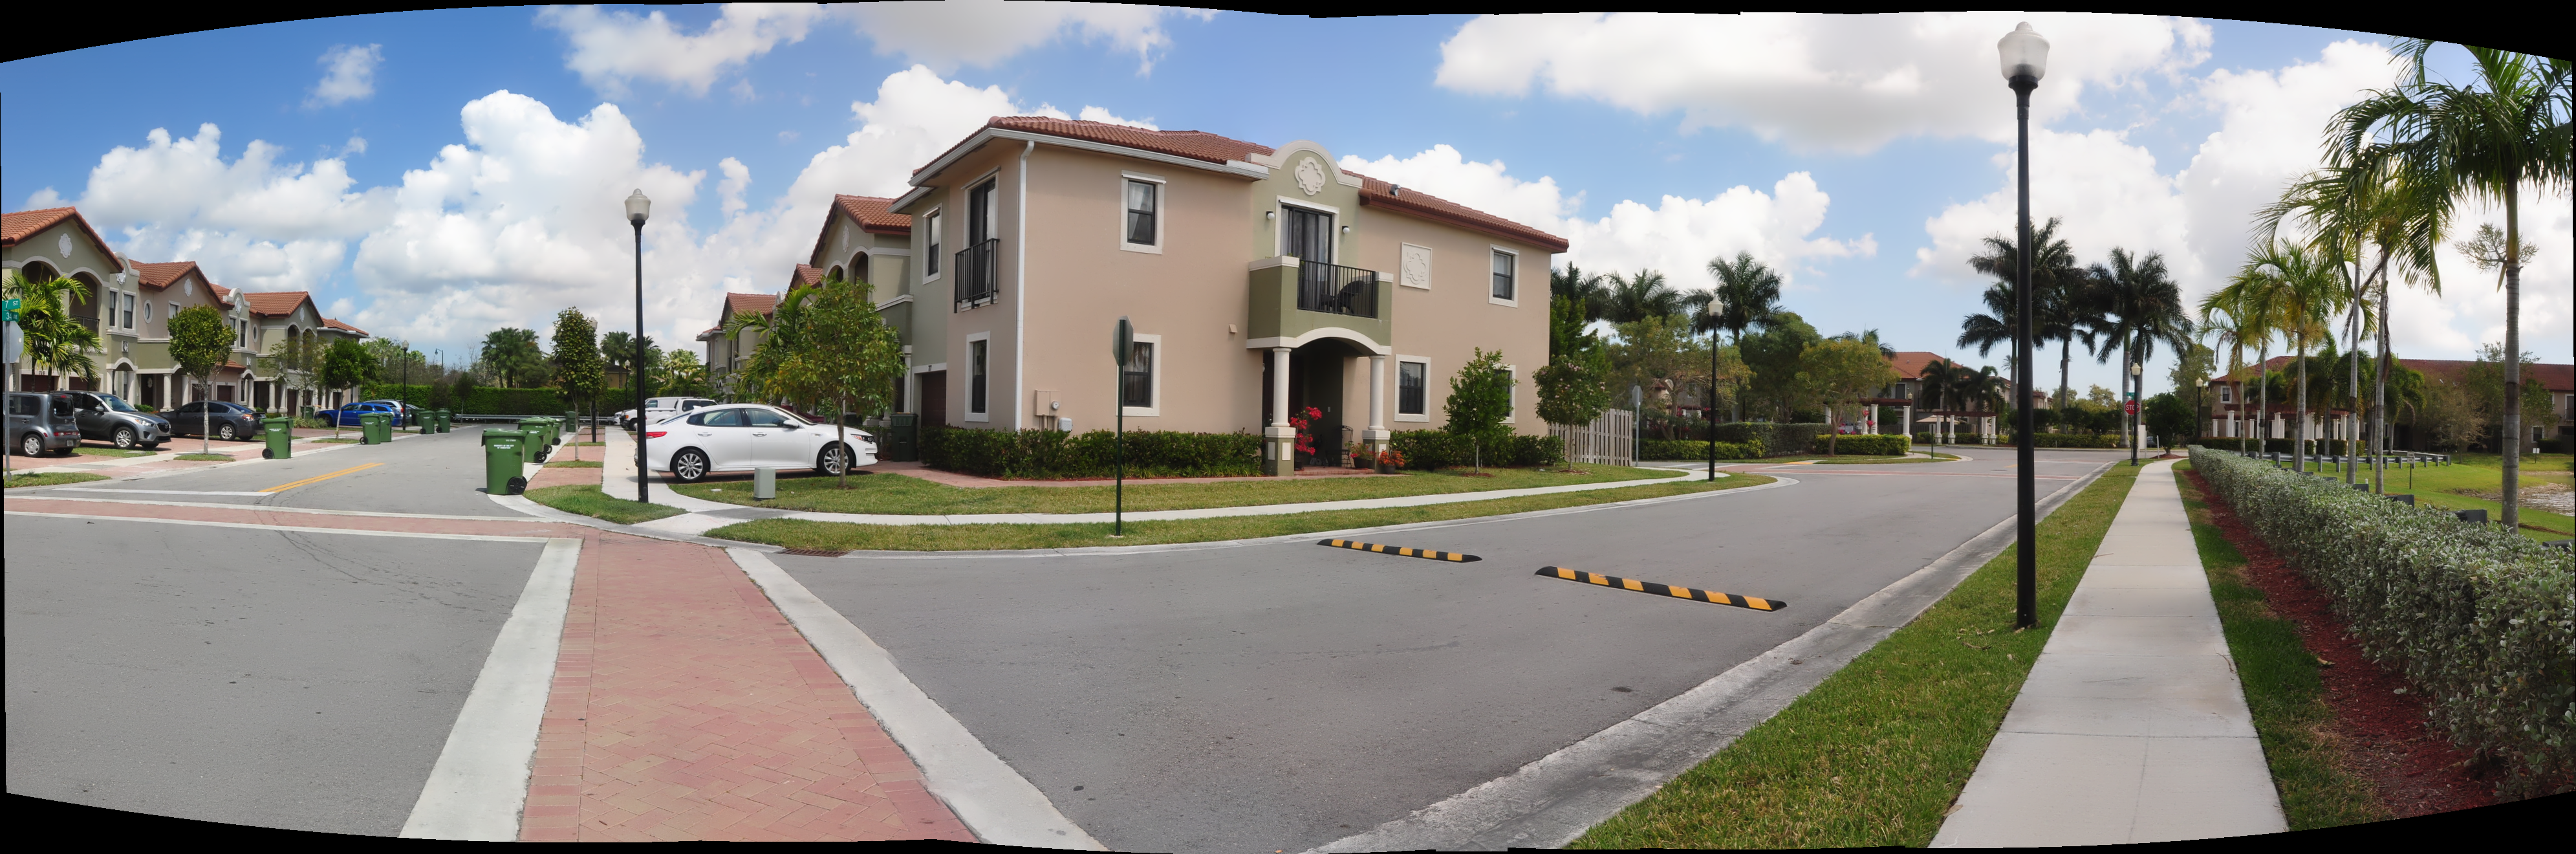

In [ ]:
cv2_imshow(stitched_image)